In [1]:
from project_utils import *
import sklearn
import sklearn.datasets
import sklearn.linear_model
from PIL import Image

In [2]:
train_x, train_x_log, train_y, test_x, test_y, valid_x, valid_x_log, valid_y = load_data()
train_y = train_y.reshape(train_y.shape[0], -1).T
train_x = train_x.T

test_y = test_y.reshape(test_y.shape[0], -1).T
test_x = test_x.T

valid_y = valid_y.reshape(valid_y.shape[0], -1).T
valid_x = valid_x.T

In [3]:
train_x = train_x/255
valid_x = valid_x/255
test_x = test_x/255

# Logistic Regression

In [4]:
clf = sklearn.linear_model.LogisticRegressionCV(max_iter = 1000)
clf.fit(train_x_log, train_y.T)

LR_predictions = clf.predict(valid_x_log)
print ('Accuracy of logistic regression: %d ' % float((np.dot(valid_y,LR_predictions) + np.dot(1-valid_y,1-LR_predictions))/float(valid_y.size)*100) +
       '% ' + "(percentage of correctly labelled datapoints)")

c:\Users\akash\OneDrive\Documents\MSBA\Deep Learning\dl\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy of logistic regression: 55 % (percentage of correctly labelled datapoints)


# Shallow NN

In [5]:
# X -- dataset of shape (2, number of examples)
# Y -- labels of shape (1, number of examples)
# n_h -- size of the hidden layer
# num_iterations -- Number of iterations in gradient descent loop
# print_cost -- if True, print the cost every 1000 iterations
# this function returns parameters learnt by the model. They can then be used to predict.

def nn_model(X, Y, n_h, num_iterations = 10000, print_cost=False):
    
    np.random.seed(3)
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[2]
    
    # Initialize parameters
    parameters = initialize_parameters(n_x, n_h, n_y)
    costs = []  
    # Loop (gradient descent)
    for i in range(0, num_iterations):

        # Forward propagation. Inputs: "X, parameters". Outputs: "A2, cache".
        A2, cache = forward_propagation(X, parameters)

        # Cost function. Inputs: "A2, Y, parameters". Outputs: "cost".
        cost = compute_cost(A2, Y)
 
        # Backpropagation. Inputs: "parameters, cache, X, Y". Outputs: "grads".
        grads = backward_propagation(parameters, cache, X, Y)
 
        # Gradient descent parameter update. Inputs: "parameters, grads". Outputs: "parameters".
        parameters = update_parameters(parameters, grads, learning_rate=0.000003)
        
        # print(i)
        # Print the cost every 1000 iterations
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
            costs.append(cost)

    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + "0.000003")
    plt.show()

    return parameters

Cost after iteration 0: 0.693123
Cost after iteration 100: 0.693064
Cost after iteration 200: 0.692984
Cost after iteration 300: 0.692917
Cost after iteration 400: 0.692812


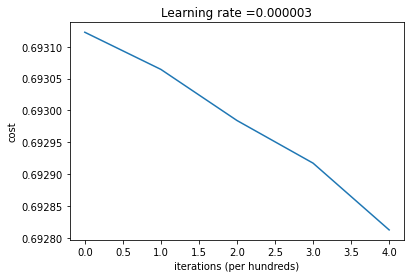

In [6]:
parameters = nn_model(train_x, train_y, n_h = 4, num_iterations = 500, print_cost=True)

# Plot the decision boundary
# plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
# plt.title("Decision Boundary for hidden layer size " + str(4))

In [7]:
predictions = predict(parameters, valid_x)
print ('Accuracy: %d' % float((np.dot(valid_y,predictions.T) + np.dot(1-valid_y,1-predictions.T))/float(valid_y.size)*100) + '%')

Accuracy: 51%


## Two Layer Model

In [8]:
def L_layer_model(X, Y, layers_dims, learning_rate = 0.00075, num_iterations = 3000, print_cost=False):#lr was 0.009

    np.random.seed(1)
    costs = []                         # keep track of cost
    parameters = initialize_parameters_deep(layers_dims)
    # print(parameters)
    # Loop (gradient descent)
    for i in range(0, num_iterations):

        # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
        AL, caches = L_model_forward(X, parameters)
        
        # Compute cost.
        cost = compute_cost(AL, Y)
        
        # Backward propagation.
        grads = L_model_backward(AL, Y, caches)
 
        # Update parameters.
        parameters = update_parameters_deep(parameters, grads, learning_rate)
                
        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)
            
    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

Cost after iteration 0: 0.724718
Cost after iteration 100: 0.688711
Cost after iteration 200: 0.684582


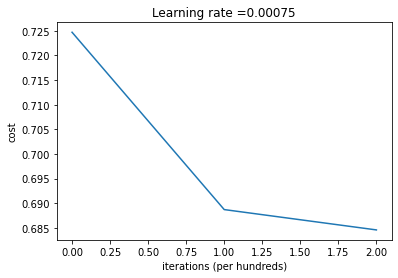

In [10]:
parameters_deep = L_layer_model(train_x, train_y, layers_dims = [19200, 7, 4, 1], num_iterations = 300, print_cost=True)

In [11]:
pred_train = predict_deep(valid_x, valid_y, parameters_deep)

Accuracy: 0.5705000000000001
